Источник этого гениального метода: https://pyimagesearch.com/2020/09/21/opencv-automatic-license-number-plate-recognition-anpr-with-python/

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

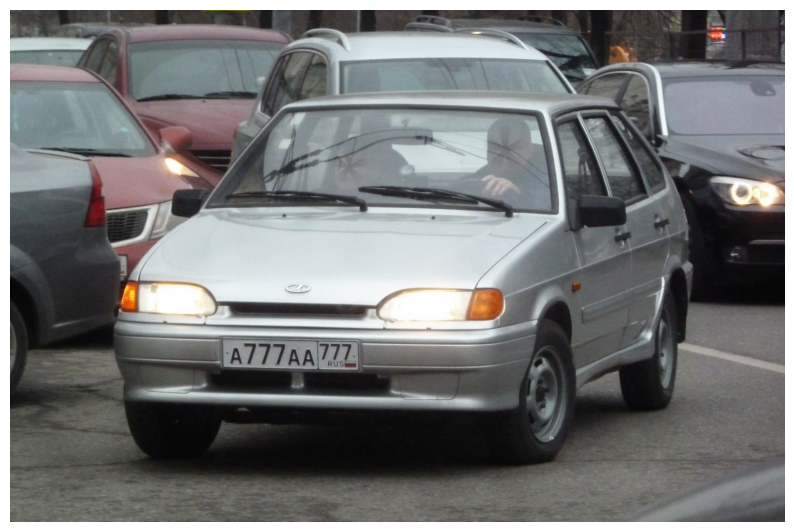

In [2]:
img = cv2.imread('./img1.jpg')
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

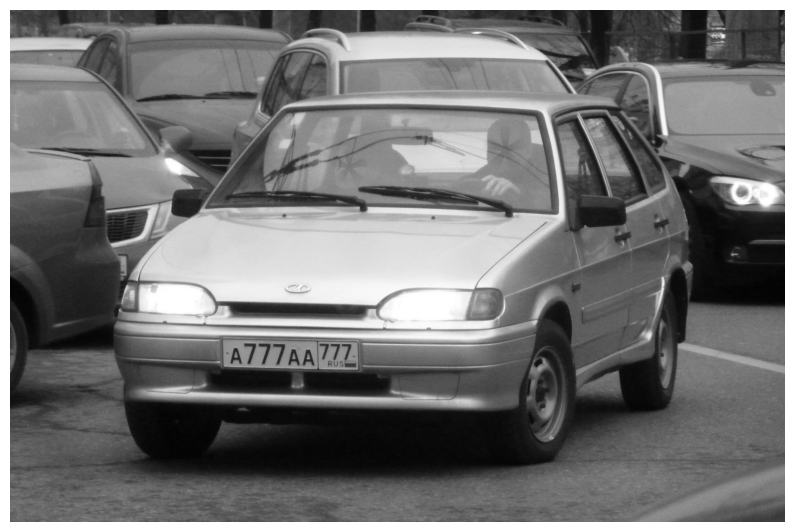

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(gray, cmap='gray')

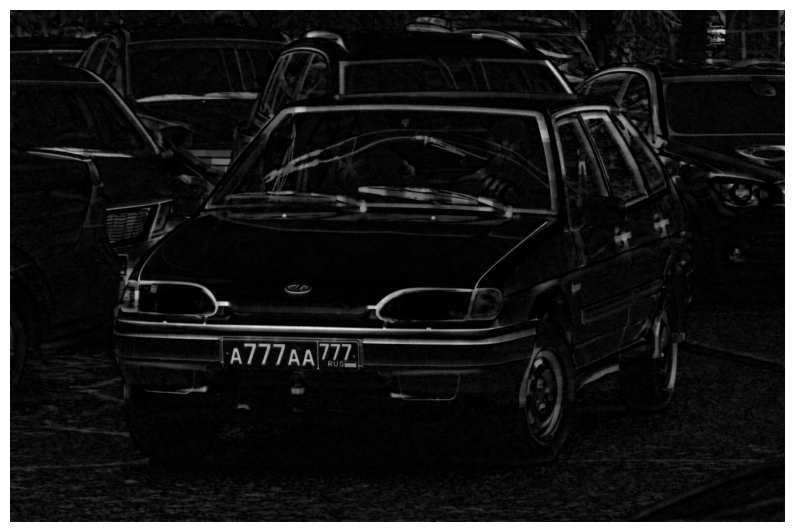

In [4]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(blackhat, cmap='gray')

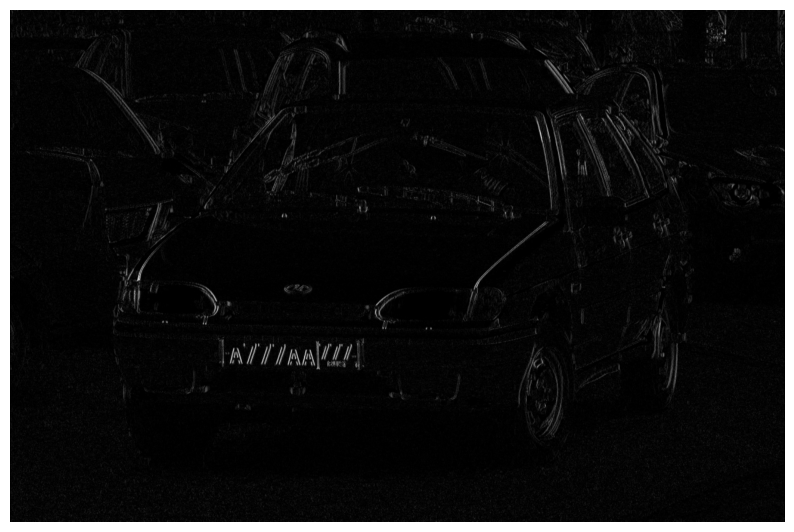

In [5]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)  
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(gradX, cmap='grey')

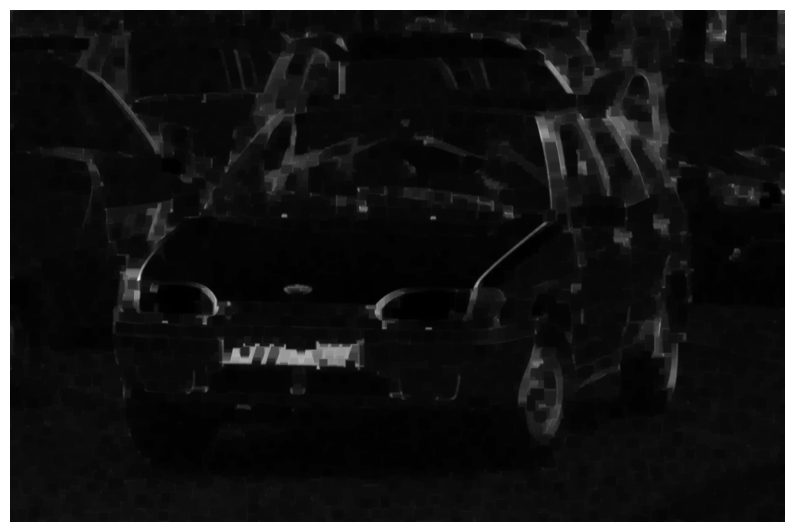

In [6]:
blur = cv2.GaussianBlur(gradX, (5, 5), 0)
blur_closed = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, rectKern)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(blur_closed, cmap='grey')

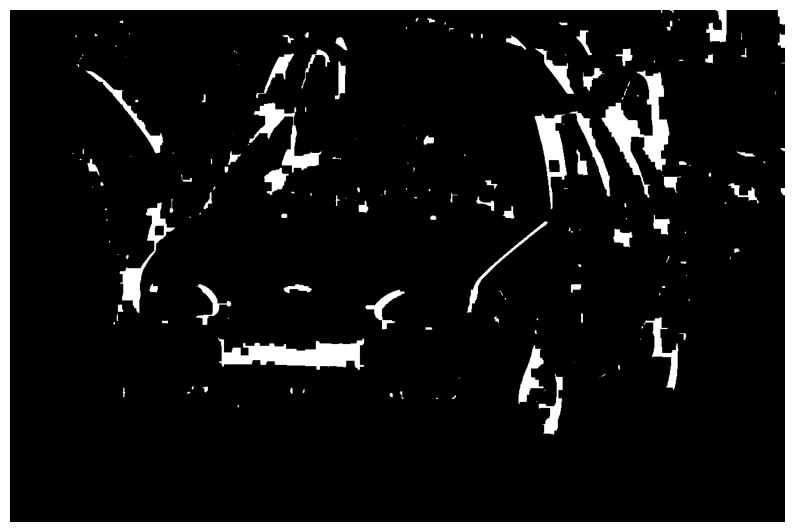

In [7]:
thresh = cv2.threshold(blur_closed, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(thresh, cmap='grey')

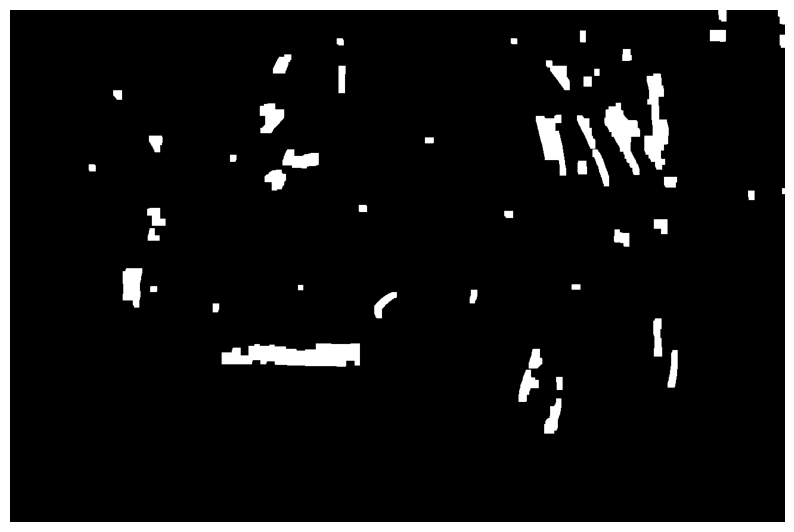

In [17]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
erosed = cv2.erode(thresh, rectKern, iterations=2)

rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated = cv2.dilate(erosed, rectKern, iterations=2)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(dilated, cmap='grey')

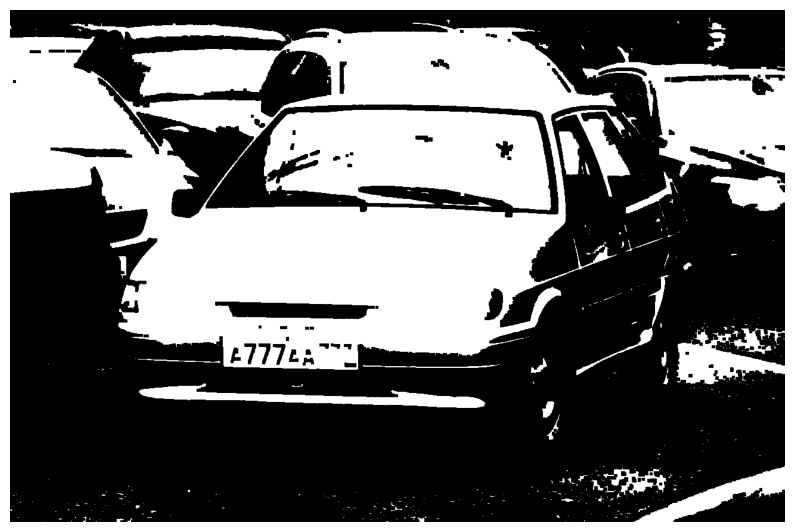

In [18]:
# этого шага не было на вебинаре, но он тоже может помочь
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(light, cmap='grey')

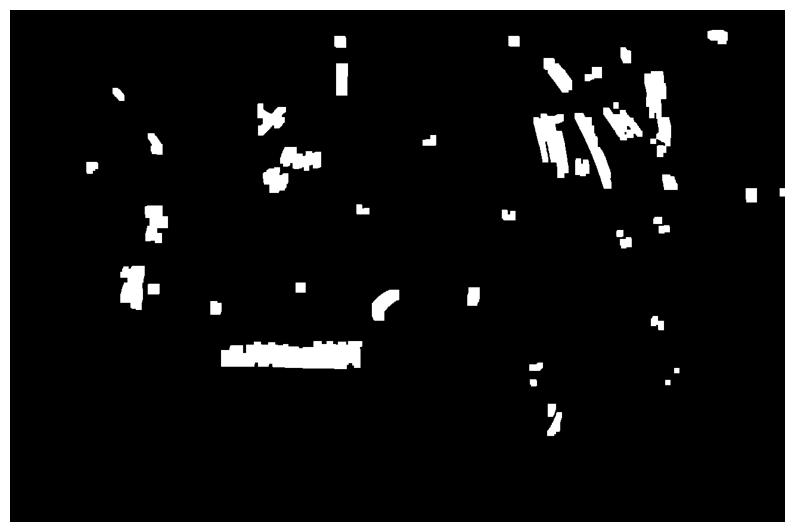

In [19]:
# бинарно накладываем две маски
final = cv2.bitwise_and(dilated, dilated, mask=light)
final = cv2.dilate(final, None, iterations=5)
final = cv2.erode(final, None, iterations=1)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(final, cmap='grey')

In [26]:
# тут можно работать и с dilated и c final
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

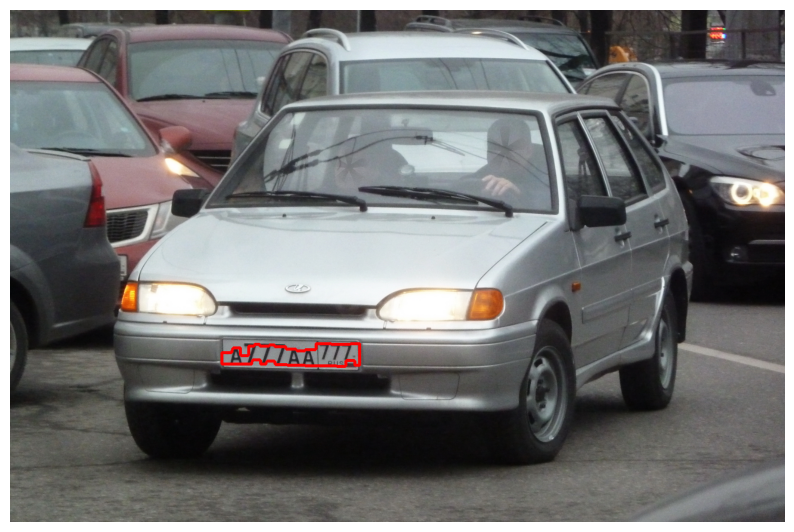

In [24]:
img = cv2.imread('./img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = cv2.drawContours(img, cnts, 0, (255,0,0), 3)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(result)

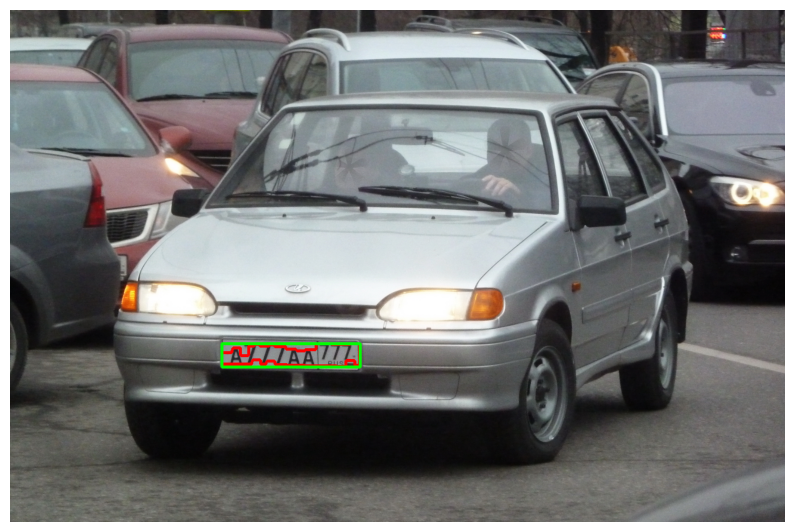

In [25]:
(x, y, w, h) = cv2.boundingRect(cnts[0])
img_final = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 4)
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(img_final)

А если бы нам не повезло и нужный контур/прямоугольник не оказался самым большим по площади, можно было бы выбрать его по соотношению сторон